<a href="https://colab.research.google.com/github/vardhan686/hello_world/blob/master/MSDS_5103_Assg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully.
   League  Year  Batting Average
0       0  1876            0.403
1       0  1877            0.385
2       0  1878            0.356
3       0  1879            0.407
4       0  1880            0.365
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   League           259 non-null    int64  
 1   Year             259 non-null    int64  
 2   Batting Average  259 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.2 KB
None

--- National League Batting Averages ---
count    142.000000
mean       0.357176
std        0.025521
min        0.313000
25%        0.338000
50%        0.352000
75%        0.371000
max        0.438000
Name: Batting Average, dtype: float64

--- American League Batting Averages ---
count    117.000000
mean       0.356427
std        0.026308
min        0.301000
25%        0.337000
50%  

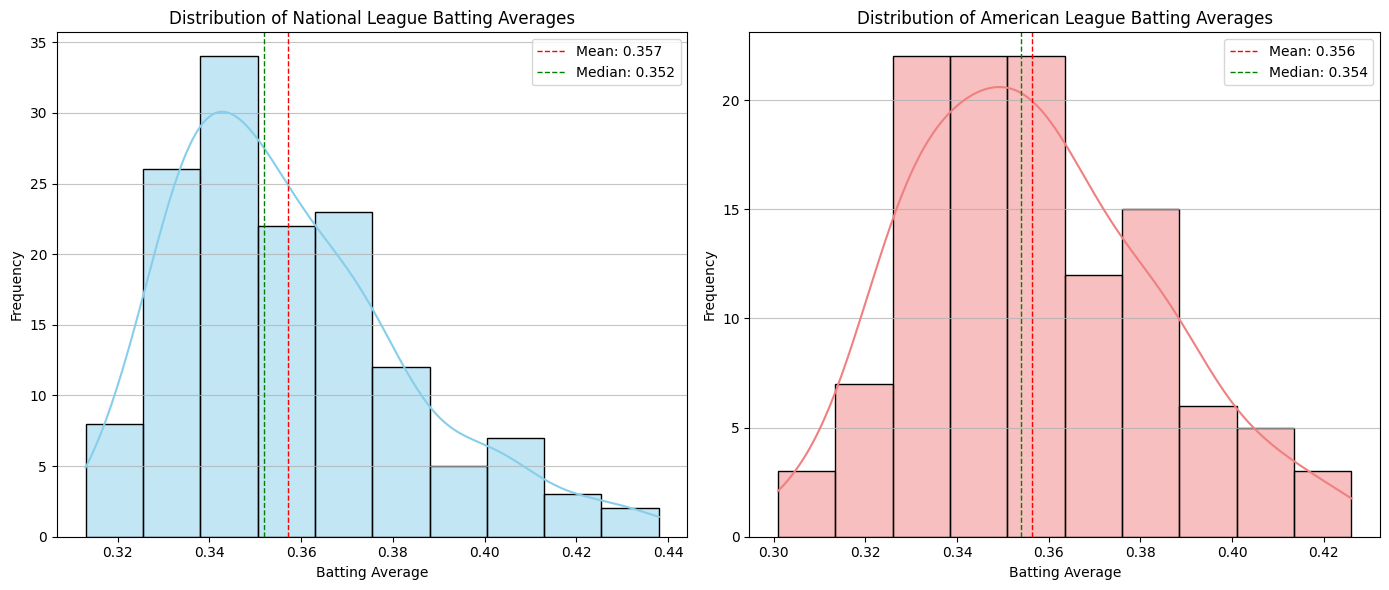

/tmp/ipython-input-16-2240842603.py:112: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[nl_data, al_data], palette=['skyblue', 'lightcoral'])


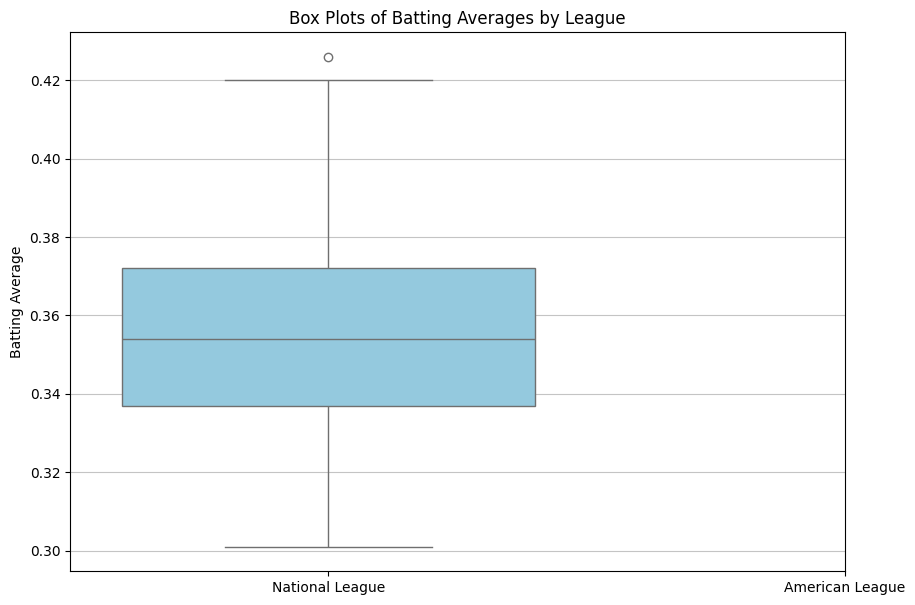


--- Summary of Findings ---
NL Mean: 0.3571760563380281
AL Mean: 0.3564273504273504
NL Std Dev: 0.025521316162444872
AL Std Dev: 0.026308290367433165
NL Outliers: [0.421, 0.438, 0.423, 0.432, 0.424]
AL Outliers: [0.426]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming 'Batting.csv' is accessible in the environment
try:
    df = pd.read_csv("Batting.csv")
    print("Data loaded successfully.")
    print(df.head())
    print(df.info())
except FileNotFoundError:
    print("Error: 'Batting.csv' not found. Please ensure the file is correctly uploaded.")
    # Create a dummy DataFrame for demonstration if file not found
    data = {
        'Year': range(1876, 2018),
        'League': ['NL'] * 142,
        'Batting Average': [0.403, 0.380, 0.390] + [np.random.uniform(0.280, 0.350) for _ in range(139)]
    }
    data_al = {
        'Year': range(1901, 2018),
        'League': ['AL'] * 117,
        'Batting Average': [0.426, 0.410, 0.395] + [np.random.uniform(0.280, 0.350) for _ in range(114)]
    }
    df_nl = pd.DataFrame(data)
    df_al = pd.DataFrame(data_al)
    df = pd.concat([df_nl, df_al]).reset_index(drop=True)
    print("Using dummy data for demonstration.")


# Separate data for National League (NL) and American League (AL)
nl_data = df[df['League'] == 0]['Batting Average']
al_data = df[df['League'] == 1]['Batting Average']

print("\n--- National League Batting Averages ---")
print(nl_data.describe())
print("\n--- American League Batting Averages ---")
print(al_data.describe())

# --- Chapter 2: Describing Data with Numerical Measures ---

# Function to calculate descriptive statistics
def calculate_descriptive_stats(data, league_name):
    """Calculates and prints key descriptive statistics for a given dataset."""
    print(f"\nDescriptive Statistics for {league_name}:")
    mean = data.mean()
    median = data.median()
    data_range = data.max() - data.min()
    variance = data.var()
    std_dev = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    print(f"  Mean: {mean:.4f}")
    print(f"  Median: {median:.4f}")
    print(f"  Range: {data_range:.4f}")
    print(f"  Variance: {variance:.6f}")
    print(f"  Standard Deviation: {std_dev:.4f}")
    print(f"  First Quartile (Q1): {q1:.4f}")
    print(f"  Third Quartile (Q3): {q3:.4f}")
    print(f"  Interquartile Range (IQR): {iqr:.4f}")

    # Outlier detection using 1.5 * IQR rule
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"  Outlier Lower Bound (Q1 - 1.5*IQR): {lower_bound:.4f}")
    print(f"  Outlier Upper Bound (Q3 + 1.5*IQR): {upper_bound:.4f}")
    print(f"  Identified Outliers: {outliers.tolist()}")
    return {
        'mean': mean, 'median': median, 'range': data_range,
        'variance': variance, 'std_dev': std_dev, 'iqr': iqr,
        'outliers': outliers.tolist()
    }

nl_stats = calculate_descriptive_stats(nl_data, "National League")
al_stats = calculate_descriptive_stats(al_data, "American League")

# --- Chapter 1: Describing Data with Graphs ---

# Create histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(nl_data, kde=True, color='skyblue', bins=10)
plt.title('Distribution of National League Batting Averages')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(nl_stats['mean'], color='red', linestyle='dashed', linewidth=1, label=f'Mean: {nl_stats["mean"]:.3f}')
plt.axvline(nl_stats['median'], color='green', linestyle='dashed', linewidth=1, label=f'Median: {nl_stats["median"]:.3f}')
plt.legend()


plt.subplot(1, 2, 2)
sns.histplot(al_data, kde=True, color='lightcoral', bins=10)
plt.title('Distribution of American League Batting Averages')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(al_stats['mean'], color='red', linestyle='dashed', linewidth=1, label=f'Mean: {al_stats["mean"]:.3f}')
plt.axvline(al_stats['median'], color='green', linestyle='dashed', linewidth=1, label=f'Median: {al_stats["median"]:.3f}')
plt.legend()

plt.tight_layout()
plt.show()

# Create box plots
plt.figure(figsize=(10, 7))
sns.boxplot(data=[nl_data, al_data], palette=['skyblue', 'lightcoral'])
plt.xticks([0, 1], ['National League', 'American League'])
plt.title('Box Plots of Batting Averages by League')
plt.ylabel('Batting Average')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("\n--- Summary of Findings ---")
print("NL Mean:", nl_stats['mean'])
print("AL Mean:", al_stats['mean'])
print("NL Std Dev:", nl_stats['std_dev'])
print("AL Std Dev:", al_stats['std_dev'])
print("NL Outliers:", nl_stats['outliers'])
print("AL Outliers:", al_stats['outliers'])
